In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("C:/Users/Christian/Desktop/N1GO_data/N1GO.csv", delimiter=";")

In [12]:
df.head()
print(df.shape)

(134782, 16)


In [13]:
df.isna().sum()

CabinetVisitId                      0
CabinetId                           0
AISeries                            0
AISeriesProbability                 0
AIType                           1054
AITypeProbability                 159
CollectorSeries                     0
CollectorType                      65
CollectorComment               127891
CollectorCabinetConditionId         0
ValidatedSeries                     0
ValidatedType                      23
ValidatedConditionId                1
ImageName                           0
ImageURL                            0
RowNumber                           0
dtype: int64

In [14]:
df = df.dropna(subset=['ValidatedType'])

In [15]:
df = df[df['ValidatedConditionId'] != 0.0]

In [16]:
unique_count = df['ValidatedType'].nunique()
print(f"Number of unique values in ValidatedType: {unique_count}")

Number of unique values in ValidatedType: 34


In [32]:
pivot_table = pd.pivot_table(df, values='CabinetVisitId', index='ValidatedType', columns='ValidatedConditionId', aggfunc='count', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table.loc['Total'] = pivot_table.sum()
pivot_table

ValidatedConditionId,1.0,2.0,3.0,4.0,Total
ValidatedType,,,,,
BC,217,142,19,5,383
BC K.M.skab,1363,299,37,10,1709
CP1,10150,1019,65,188,11422
CP3,32962,2978,128,510,36578
CP4,5230,368,12,87,5697
CP6,1385,105,4,30,1524
KSE09,9208,799,46,46,10099
KSE12,12801,856,48,59,13764
KSE15,10217,648,43,29,10937


In [18]:
df['ai_acc_series'] = (df['ValidatedSeries'] == df['AISeries']).astype(int)
df['ai_acc_type'] = (df['ValidatedType'] == df['AIType']).astype(int)

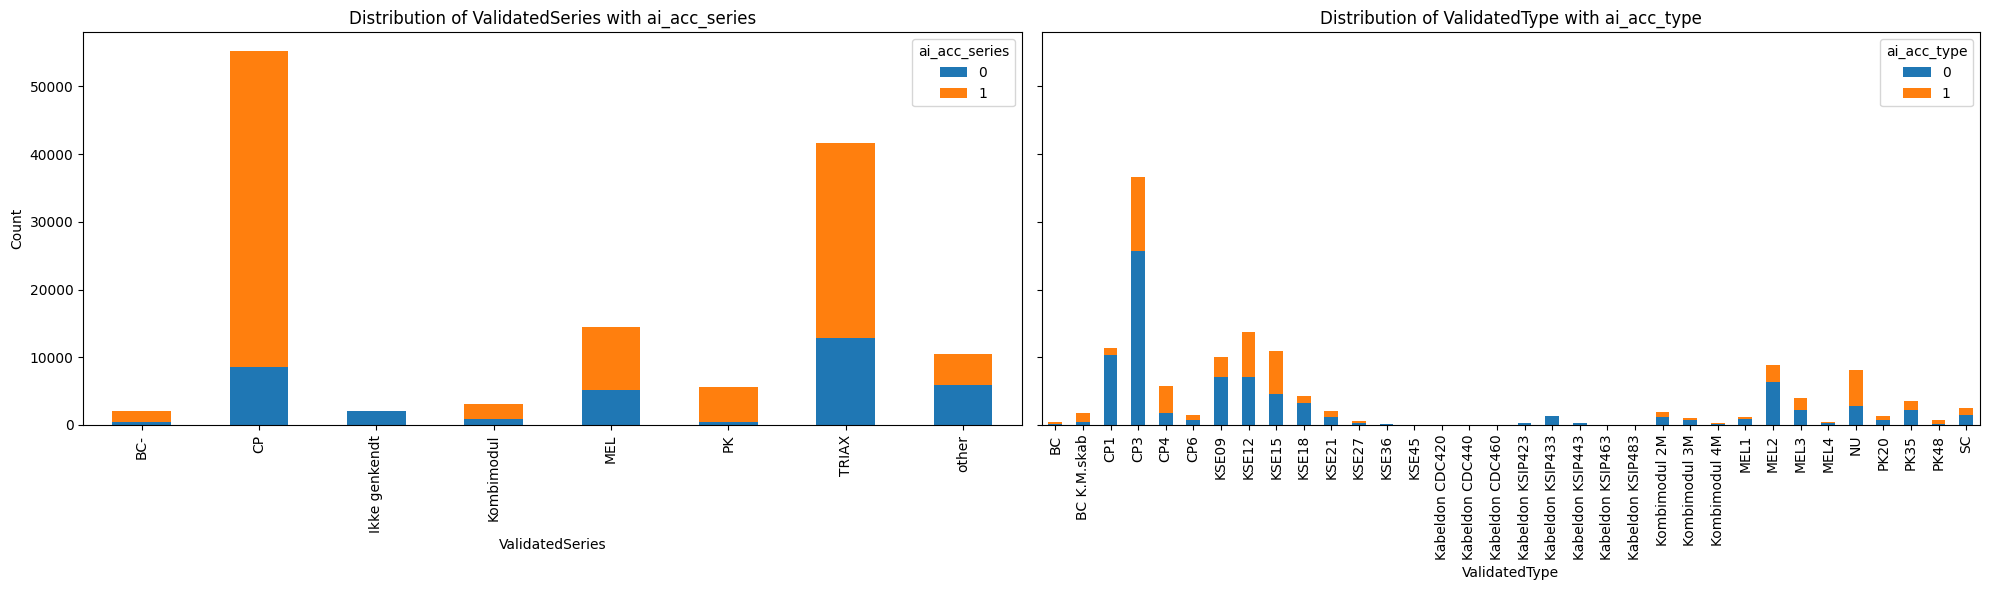

In [40]:
validated_series_distribution = df.groupby('ValidatedSeries')['ai_acc_series'].value_counts().unstack()
validated_type_distribution = df.groupby('ValidatedType')['ai_acc_type'].value_counts().unstack()

fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Plot for ValidatedSeries and ai_acc_series
validated_series_distribution.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Distribution of ValidatedSeries with ai_acc_series')
axes[0].set_xlabel('ValidatedSeries')
axes[0].set_ylabel('Count')
axes[0].legend(title='ai_acc_series')

# Plot for ValidatedType and ai_acc_type
validated_type_distribution.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Distribution of ValidatedType with ai_acc_type')
axes[1].set_xlabel('ValidatedType')
axes[1].legend(title='ai_acc_type')

plt.tight_layout()
plt.show()

In [48]:
ai_acc_counts_series = df['ai_acc_series'].value_counts()
ai_acc_counts_series_percentage = (ai_acc_counts_series / ai_acc_counts_series.sum()) * 100
print(ai_acc_counts_series_percentage.astype(str) + " %")
ai_acc_counts_type = df['ai_acc_type'].value_counts()
ai_acc_counts_type_percentage = (ai_acc_counts_type / ai_acc_counts_type.sum()) * 100
print(ai_acc_counts_type_percentage.astype(str) + " %")

ai_acc_series
1      73.0953052409719 %
0    26.904694759028096 %
Name: count, dtype: object
ai_acc_type
0    62.0129725557716 %
1    37.9870274442284 %
Name: count, dtype: object


In [13]:
# Define sampling constraints
max_condition_4 = 10
max_condition_3 = 20
total_samples = 350

# Ensure column names match your dataset
box_type_column = "ValidatedType"  # Replace with actual column name for box type
condition_column = "ValidatedConditionId"  # Replace with actual column name for condition

# Get unique box types
box_types = df[box_type_column].unique()

# Initialize list to store sampled data
sampled_data = []

for box_type in box_types:
    subset = df[df[box_type_column] == box_type]
    
    # Sample condition 4 (max 10)
    condition_4_samples = subset[subset[condition_column] == 4].sample(
        min(len(subset[subset[condition_column] == 4]), max_condition_4), random_state=42
    )

    # Sample condition 3 (max 20)
    condition_3_samples = subset[subset[condition_column] == 3].sample(
        min(len(subset[subset[condition_column] == 3]), max_condition_3), random_state=42
    )

    # Determine remaining samples needed
    remaining_needed = total_samples - len(condition_4_samples) - len(condition_3_samples)

    # Sample from conditions 1 and 2
    remaining_samples = subset[subset[condition_column].isin([1, 2])].sample(
        min(len(subset[subset[condition_column].isin([1, 2])]), remaining_needed),
        random_state=42
    )

    # Combine all selected samples
    final_sample = pd.concat([condition_4_samples, condition_3_samples, remaining_samples])
    sampled_data.append(final_sample)

# Concatenate all sampled data
final_dataset = pd.concat(sampled_data)

print("Sampling completed. Final dataset saved as 'sampled_dataset.csv'.")


Sampling completed. Final dataset saved as 'sampled_dataset.csv'.


In [16]:
pivot_table_sample = pd.pivot_table(final_dataset, values='CabinetVisitId', index='ValidatedType', columns='ValidatedConditionId', aggfunc='count', fill_value=0)
pivot_table_sample['Total'] = pivot_table_sample.sum(axis=1)
pivot_table_sample.loc['Total'] = pivot_table_sample.sum()
pivot_table_sample

ValidatedConditionId,1.0,2.0,3.0,4.0,Total
ValidatedType,,,,,
BC,196,130,19,5,350
BC K.M.skab,268,52,20,10,350
CP1,281,39,20,10,350
CP3,285,35,20,10,350
CP4,305,23,12,10,350
CP6,306,30,4,10,350
KSE09,297,23,20,10,350
KSE12,295,25,20,10,350
KSE15,299,21,20,10,350
